## Name : Cedric PIZINA

# Assignment 3: The formation of planets and small planetary objects

In this assigment, we will consider a molten sphere that solidifies as it cools to form a solid planet or small planetary object, like an asteroid.  For simplicity, we will consider that these objects are made of a single, pure material.  If the object is small then the freezing temperature is approximately constant and, as the molten object cools, it solidifies from the cool surface inwards.  If the object is large then the variation of freezing temperature with pressure can be such that the object solidifies from the centre inwards, even though the centre is the hottest part of the object.

# Numerical preliminaries

Evaluate the following cell first to load various packages that will be useful for completing this assignment.

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Inward solidification of a small planetary object.

Consider a sphere of molten material of radius $b$ and initial temperature $T_0 \ge T_m$, where $T_m$ is the constant freezing temperature of the material.  The material has density $\rho$, latent heat $L$, specific heat $c_p$, and thermal conductivity $k$.  The surface of the sphere is maintained at constant tempertaure $T_s < T_m$, so that solid forms in the region $a(t) < r < b$, where $r$ is the local radius and $t$ is time.

Draw a sketch of this situation, including appropriate labels and a caption (you may, for example, draw and label your sketch by hand and insert the graphic here).

![Alt Text](Q1.jpeg)

Consider the case that $T_0 = T_m$ and use the quasi-stationary approximation to determine the temperature field in the annulus $a(t) < r < b$.
You may recall that, in spherical polar coordinates, if $T=T(r)$ only then
$$
  \nabla^2 T = {1\over r^2}{\partial\over\partial r}\left(r^2{\partial T \over \partial r}\right).
$$

Using the quasi-stationnary approximation, the diffusion equation in the solid is
$$ \nabla^2 T =
{1\over r^2}{\partial\over\partial r}\left(r^2{\partial T \over \partial r}\right) = 0$$ which means
$$
r^2{\partial T \over \partial r} = 0
$$

Therefore $$ T(r) = \frac{A}{r} + B$$

The boundary conditions associated to the problem is that at $r=a$, $T = T_m$ and at $r=b$, $T = T_s$. Applying those boundary conditions, we have
$$
T_m = \frac{A}{a} + B \;, \quad  T_s = \frac{A}{b} + B
$$ where $a = a(t)$. Solvinng those equations,
$$
T_m - T_s = A\left(\frac{1}{a} - \frac{1}{b}\right), \quad \text{therefore} \quad A = \frac{ab (T_m - T_s)}{b-a} \quad \text{and} \quad B = \frac{bT_s - aT_m)}{b-a}
$$
Thus $$  T(r) = \frac{1}{b-a}\left(bT_s - aT_m + ab(T_m - T_s) \frac{1}{r}\right)$$


Write down the Stefan condition and then express it in terms of the quasi-stationary temperature field you have just found.

***Answer***

The Stefan condition in the case $T_m = T_0$ which is constant, there is no temperature gradient inside the molten sphere, therefore
$$
\rho L \dot{a} = -q_s =  \rho C_p \kappa \frac{\partial T}{\partial r}\big |_{r = a}
$$

From the above expression, we find
$$
\frac{\partial T}{\partial r}\big |_{r = a} = - \frac{ab(T_m -T_s)}{(b-a) r^2} \big|_{r=a} = -  \frac{b(T_m -T_s)}{(b-a)a}
$$
Let $T_m -T_s = \Delta T$. The Stefan condition becomes
$$
L \dot{a} =  - C_p \kappa \frac{\Delta T  b }{(b-a)a}
$$

$$
\frac{L}{ C_p \Delta T } \dot{a} = - \kappa \frac{b }{(b-a)a}
$$

$$
 {\cal S} \dot{a} = - \kappa \frac{b }{(b-a)a}
$$

Determine appropriate scales for length, time and temperature differences to make the Stefan equation dimensionless.

***Answer***

The length scale is imposed by the problem, in this case we scale length $r$, $a \sim b$, the temperature difference is scaled as $\Delta T = T_m - T_s$ and the time scale is scale as $\tau$ which is determined using the Stefan condition equation


$$ \cal{S} \frac{b}{\tau} \sim \kappa \frac{b}{b^2}\;, \quad \tau \sim \frac{\cal{S} b^{2}}{\kappa} $$

Then the scaled equation for $a$ becomes
$$ \cal{S} b \frac{\kappa}{\cal{S} b^{2}}\frac{da}{dt} = - \kappa \frac{b}{a b^2(1-a)}$$

$$ \frac{da}{dt} = - \frac{1}{a(1-a)}$$

Solve the dimensionless equations analytically and make a plot of $a(t)$.  [You will not be able to find an explicit formula for $a(t)$ but you will be able to find an explicit formula for $t(a)$.]

***Answer***

The variables of this ODE are separable, so  $$ a(1-a) da = -dt $$
$$ \frac{a^2}{2} - \frac{a^3}{3} = - t + D $$
At $t=0$ we are expecting the interface molten and the solid coincides with the surface of the sphere, therefore $a(0) = 1$ ( dimensionless! For the dimensional equation a(0) = b). Therefore
$$ \frac{1}{2} - \frac{1}{3} = \frac{1}{6} = D\; , \quad t(a) =  \frac{1}{6} -\frac{a^2}{2} + \frac{a^3}{3}$$

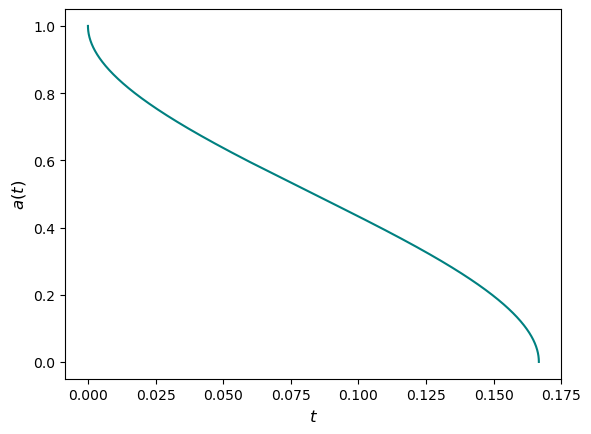

In [5]:
def t(a):
    return (1/6) - (a**2 / 2) + (a**3 / 3)
a = np.linspace(0, 1, 1000)
t_values = t(a)
plt.plot(t_values, a, color ='teal')
plt.xlabel('$t$', fontweight='bold', fontsize=12)
plt.ylabel('$a(t)$', fontweight='bold', fontsize=12);

Describe in words the shape of the graph of $a(t)$.  Are there any times when you expect the quasi-stationary approximation to be invalid?  Why?  [When you make an approximate theory, it is good to be aware of its limitations.]

***Answer***

The plot show that $a(t)$ decreases from $a=1$ at $t=0$ to $a=0$ at $t≈0.165$. The slope of the graph is very steep near to $t=0$, is moderate in the intermediate time, and becomes steep again as $t$ approaches $0.165$. The curve indicates the non-linearity of the relation between $a$ and $t$.

The steep slope at $t=0$ suggests that the interface molten-solid moves extremely fast because the temperature changes rapidly, therefore the transient effects is not really negligible. In that case, the quasi-stationary approximation is not valid. We observe the same behaviour as $t$ approaches $0.165$ approximately, because the molten core shrinks rapidly.

# Inward solidification of a superheated molten sphere

In the previous section, we considered the case that the molten sphere was initially at its freezing temperature $T_m$.  Now consider the case that the sphere of molten material has an initial temperature $T_0>T_m$.  In typical situations, the resulting Rayleigh number is very large and we can approximate the heat flux from the molten core $r<a(t)$ to the solidification front to be given by
$$
  F = \lambda k \left({\alpha g\over\kappa\nu}\right)^{1/3} (T - T_m)^{4/3},
$$
where $\lambda$ is a constant, $\alpha$ is the coefficient of thermal expansion, $g$ is the acceleration due to gravity, $\kappa$ is the thermal diffusivity, $\nu = \mu/\rho$ is the kinematic viscosity of the melt, and $T(t)$ is the uniform mean temperature of the molten core.

Write down the Stefan equation for this problem and scale it as before to produce a dimensionless version involving the dimensionless constant
$$
  {\cal F} = \lambda\left({\alpha g\Delta T b^3\over\kappa\nu}\right)^{1/3}
$$
and the dimensionless (variable) temperature difference in the core $\theta(t) = (T(t) - T_m)/\Delta T$, where $\Delta T = T_m - T_s$.

***Answer***

The Stefan condition is modified because the molten has a temperature gradient, that means the is another heat flux involved. Therefore

$$
\rho L \dot{a} = \lambda \rho C_p \kappa \left( \frac{\alpha g}{\kappa \nu} \right)^{1/3} (T-T_m)^{4/3} + \rho C_p \kappa \frac{\partial T}{\partial r}\big |_{r = a}
$$

$$
\rho L \dot{a} = \lambda \rho C_p \kappa \left( \frac{\alpha g}{\kappa \nu} \right)^{1/3} (T-T_m)^{4/3} - \rho C_p \kappa \frac{b(T_m - T_s)}{a(b-a)}
$$


Recall the scales :  $a\sim b$, $\theta(t) = (T(t) - T_m)/\Delta T$, where $\Delta T = T_m - T_s$ and $t\sim{\cal{S}b^{2}}/{\kappa}$. The scaled equation is obtained as follows:



$$
\frac{L \kappa b}{\cal{S} b^{2}}\dot{a} = \lambda C_p \kappa \left( \frac{\alpha g}{\kappa \nu} \right)^{1/3} \Delta T^{4/3}  \theta^{4/3} - C_p \kappa \frac{b\Delta T}{a b^{2}(1-a)}
$$

$$
\frac{L \kappa} {{\cal{S}} b C_p \Delta T}\dot{a} = \lambda \kappa \left( \frac{\alpha g \Delta T }{\kappa \nu} \right)^{1/3}  \theta^{4/3} - \kappa \frac{1}{a b(1-a)}
$$

$$
\dot{a} = \lambda  \left( \frac{\alpha g b^3 \Delta T}{\kappa \nu} \right)^{1/3} \theta^{4/3} - \frac{1}{a(1-a)}
$$

$$
\dot{a} = \cal{F} \theta^{4/3} - \frac{1}{a(1-a)} \;, \quad a(0) = 1
$$
is the dimensionless equation involving dimensionless $a$, $t$ and $\theta$

**Explain carefully the equation describing the evolution of the temperature of the molten core
$$
  {4\over 3}\pi a^3 \rho c_p{dT\over dt} = -4\pi a^2 F
$$
and make this equation dimensionless using the same scalings as before.**

***Answer***

The equation describing the evolution of the molten core’s temperature in time is obtained by the heat energy conservation. The molten core has a radius $a$ and loses heat at its surface with a rate $\rho V C_p dT/dt$, where $V$ is the volume of the core (spherical), due to the convective flux $F$. The energy conservation requires the balance between this rate of change of heat energy inside the molten core and the total heat flux going out of the molten core, which is equal to $FA$, where is the surface area of the spherical shape of the molten core. Hence the equation

$$
  {4\over 3}\pi a^3 \rho c_p{dT\over dt} = -4\pi a^2 F
$$
where the negative sign expresses the fact that the change in temperature in time is negative as the molten core loses heat. To find the non-dimensional equation from this, we apply the scaling defined above and we obtain the following :

$$ \frac{4}{3} \pi a^3 \rho C_p \frac{dT}{dt} = - 4 \pi a^2 \lambda  \rho C_p \kappa \left({\alpha g\over\kappa\nu}\right)^{1/3} (T - T_m)^{4/3}$$

$$\frac{1}{3} a^3 \frac{dT}{dt} = - a^2 \lambda \kappa \left({\alpha g\over\kappa\nu}\right)^{1/3} (T - T_m)^{4/3} $$

Using the scaling set up before, the equation becomes

$$\frac{1}{3} b^3 a^3 \frac{\Delta T}{\dfrac{\cal{S}b^2}{\kappa}} \frac{d\theta}{dt} = - b^2 a^2 \lambda \kappa \left({\alpha g\over\kappa\nu}\right)^{1/3} \Delta T^{4/3} \theta^{4/3} \quad \quad \text{(a is already the scaled one here)}$$  

$$ \frac{a}{3\cal{S}}  \dot{\theta} =  - \lambda\left({\alpha g\Delta T b^3\over\kappa\nu}\right)^{1/3} \theta^{4/3}$$

$$  \dot{\theta} = - \frac{3\cal{S}}{a}\cal{F} \theta^{4/3} $$  
with an initial condidion $\theta(0) =\theta_0  =(T_0 - T_m)/\Delta T$

$$ $$

You should now have two evolution equations: one for $\dot a$ and one for $\dot \theta$.  Below, I have provided a code that is a higher-order variant of the Euler code we studied previously.  Study this code to understand how it works and then adapt it to solve the second-order differential system for $a$ and $\theta$.  Notice that, in the example, this scheme gives a reasonable approximation to the exact solution with just 5 steps and very good approximations with $N$ changed to 10 or 20.  You will certainly need more than 5 steps in the computations below but this higher-order scheme will allow you to make computations in a reasonable amount of time.

Make a single graph including the scaled value of $a(t)$, the scaled value of $a(t)$ corresponding to the first case above when the core started at temperature $T_m$, and the scaled temperature of the core divided by its initial value, all as functions of the scaled time $t$.  You should indicate what values of $\cal F$ and initial (scaled) temperature of the core were used to produce your graph.


/tmp/ipykernel_162073/581307915.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  return F * y2 ** (4/3) - 1 / qs


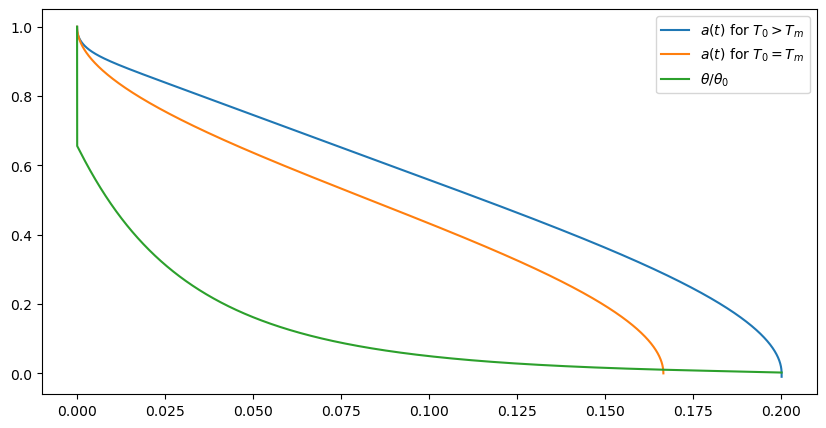

In [89]:
F = 10  
S = 1.0  
theta0 = 1.5
dx = 1e-6  
a_min = 1e-4  
t_max = 1  
N = int(t_max / dx) + 1 

# This is the equation for da/dt and
def f1(x, y1, y2):
    qs = y1 * (1 - y1)
    return F * y2 ** (4/3) - 1 / qs

# This is the equation for  dθ/dt
def f2(x, y1, y2):
    return -3 * F * S * y2**(4/3) / y1

# Initialize t, a and θ
x = np.arange(0, t_max + dx, dx)
y1 = np.zeros(N)  # a(t)
y2 = np.zeros(N)  # θ(t)

# Initial conditions
y1[0] = 1 
y2[0] = theta0

# Mid-point Euler method
for i in range(0, N):
    # Mid-point
    ym1 = y1[i] + (dx/2) * f1(x[i], y1[i], y2[i])
    ym2 = y2[i] + (dx/2) * f2(x[i], y1[i], y2[i])
    
    # Keep a between a_min and 1, θ between 0 and θo
    ym1 = min(max(ym1, a_min), 1)
    ym2 = max(ym2, 0)
    
    y1[i+1] = y1[i] + dx * f1(x[i] + dx/2, ym1, ym2)
    y2[i+1] = y2[i] + dx * f2(x[i] + dx/2, ym1, ym2)
    
   
    # We want to plot only when a is greater than a_min (just to make the plot nicer)
    if y1[i+1] <= a_min:
        x = x[:i+2]
        y1 = y1[:i+2]
        y2 = y2[:i+2]
        break

# Plot
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(x,y1 , label = '$a(t)$ for $T_0 > T_m$')
ax.plot(t_values, a, label ='$a(t)$ for $T_0 =  T_m$')
ax.plot(x,y2/theta0, label = '$\\theta/\\theta_0$')
#ax.grid(True)
ax.legend();

How does the time to solidify completely vary with the strength of convection $\cal F$?  Discuss what you find both in terms of scaled time and in terms of physical time.  Does a larger molten body have a bigger or smaller value of $\cal F$?  Does a larger molten body solidify more or less quickly than a smaller one if they start at the same temperature?

***Answer***

The convection $\cal{F}$ has changed the behaviour of $a(t)$ in the sense that it decelerates the rate solidification of the planetary object. The time needed to solidify the entire object is longer when the object started to a temperature $T_0 > T_m$ compared to the first case considered above. In terms of convection strength, according to simulations I performed, the values of $\cal{F}$ affects mostly the temperature, but it is observed also that larger body have bigger value of $\cal{F}$ and the time needed for solidification is larger. It is consistent with the fact that the time scale is proportional to $b^2$ and the $\cal{F}$ is proportional to $b$. 


# Formation of a solid inner core in a large planetary object

In a large planetary object, we need to consider the effect of pressure on the equilibrium freezing temperature.  The Clausius-Clapeyron equation, coupled with the equation for hydrostatic pressure inside a sphere of radius $b$, shows that the equilibrium freezing temperature is
$$
  T_e(r) = T_c - (T_c - T_m){r^2\over b^2},
$$
where $T_c$ is the freezing temperature at the centre of the planet and $T_m$ is the freezing temperature at its surface.

We can model the formation of a solid inner core as follows.  Imagine that the planetary body has solidified in the inner core region $0<r<a(t)$ but is still molten in the outer core region $a(t) < r < b$.  For simplicity, we ignore any heat flux from the inner core.  We can also assume that the outer core is convecting turbulently and has a uniform mean temperature $T(t)$.  Convection in the core provides a heat flux to the surface, and we are given that the planet radiates energy into space with a constant surface heat flux $F_s$.

Draw a sketch of this set up.
![Alt Text](Q2.jpeg)
Equations governing the evolution of the planet are given by
$$
  \eqalign{
  \rho L \dot a &= F \cr
  \rho c_p {4\pi\over 3}(b^3 - a^3)\dot T &= 4\pi a^2 F - 4\pi b^2 F_s \cr}
$$
where
$$
  \eqalign{
  F   &= \lambda k \left({\alpha g\over\kappa\nu}\right)^{1/3}\left[T_e(a) - T\right]^{4/3} \quad \hbox{if} \quad T < T_e(a),
  \quad \hbox{otherwise} \quad F = 0\cr
  F_s &= \lambda k \left({\alpha g\over\kappa\nu}\right)^{1/3}\left[T - T_s\right]^{4/3}. \cr}
$$
Describe these equations carefully and then make them dimensionless, using the radial scale $b$ and the temperature scale $\Delta T = T_c - T_m$. You may find it useful to introduce the dimensionless surface heat flux
$$
  {\cal F}_s = \frac{F_s}{k\Delta T/b}.
$$

Note that $T_s$ is a variable that can be determined straightforwardly in terms of $T$ using the last of the equations above.
You may use dimensionless temperature variables
$$
  \theta = {T - T_m\over\Delta T}, \qquad \theta_e = {T_e - T_m\over\Delta T}, \qquad \theta_s = {T_s - T_m\over\Delta T}.
$$
Note that a surface crust will begin to form once $T_s < T_m$, so $\theta_s < 0$, and we will stop our calculations at that point.

***Answer***
-  The first equation is the the Stefan conditioin that determines the rate of solidification of the planetary object. The second equation is derived from the heat energy conservation, the rate of change of heat energy in the molten core should balance with the net heat received. That is, the molten releases heat to the surface at a flux $F_s$, which gives a total flux across the surface $4\pi b^2 F_s$. On the other hand, it receives heat with a flux $F$ from the hot solid across the surface area $4\pi a^2$, which gives a total $4\pi a^2$. The rate of change of heat energy in the molten is $\rho V C_p dT/dt$ where ${V= 4\pi \over 3}(b^3 - a^3)$ (volume of the part between the radius $a$ and $b$).
$$
  \eqalign{
  \rho L \dot a &= F \cr
  \rho c_p {4\pi\over 3}(b^3 - a^3)\dot T &= 4\pi a^2 F - 4\pi b^2 F_s \cr}
$$

- **Scaling analysis**

The radial scale is $b$, $a\sim b$, the temperature difference is $\Delta T$, need to find the timescale of the problem. Using the Stefan condition, we have the following

$$ \rho L \frac{b}{t} \sim \lambda \rho C_p \kappa \left(\frac{\alpha g }{\kappa \nu}\right)^{1/3} \Delta T^{4/3}$$

$$ L \frac{b^2}{t} \sim \lambda C_p \kappa \left(\frac{\alpha g \Delta T b^3}{\kappa \nu}\right)^{1/3} \Delta T$$

$$ t \sim \frac{\cal{S} b^2}{\cal{F} \kappa}$$


$$ \rho L \dot a = \lambda k \left({\alpha g\over\kappa\nu}\right)^{1/3}\left[T_e(a) - T\right]^{4/3}$$


To find the scale of $Te - T$, we have
$$\theta_e -  \theta = \frac{Te-T}{\Delta T}$$

and

$$
  \eqalign{
  T_e(r) - T_m &= T_c - T_m - (T_c - T_m)\frac{r^2}{b^2}   \cr
                &= (T_c - T_m) \left(1- \frac{r^2}{b^2}\right)   \cr
                &= \Delta T \left(1- \frac{r^2}{b^2}\right)}
$$

Therefore $\theta_e(r) = 1- \dfrac{r^2}{b^2} $ and $\theta_e(a) = 1- \dfrac{a^2}{b^2}$. As $a$ is scaled as $b$, therefore $\theta_e(a) = 1- a^2$ where $a$ is already scaled. \\


The Stefan condition equation is now written as

$$ \rho L \frac{\cal{F} \kappa b}{\cal{S} b^2} \dot a = \lambda \rho C_p \kappa \left({\alpha g\over\kappa\nu}\right)^{1/3} \Delta T^{4/3}(\theta_e - \theta)^{4/3} $$

$$ L \frac{\cal{F} }{\cal{S} b} \dot a = \lambda C_p  \left({\alpha g\Delta T\over\kappa\nu}\right)^{1/3} \Delta T (1 - a^2 - \theta)^{4/3}   $$

$$ \frac{L \cal{F} }{ {\cal{S}} C_p \Delta T} \dot a = \lambda  \left({\alpha g\Delta T b^3\over\kappa\nu}\right)^{1/3}  (1 - a^2 - \theta)^{4/3}  $$

$$ \cal{F} \dot a =  \cal{F} (1 - a^2 - \theta)^{4/3} $$

$$ \dot a =  (1 - a^2 - \theta)^{4/3} \; \quad \text{if $\theta<1−a^2$, else $0$,}$$   


And the conservation equation becomes

$$ \frac{1}{3}\rho C_p b^3(1-a^3) \frac{\Delta T \cal{F} \kappa }{\cal{S} b^2} \dot \theta = b^2 (a^2 F - F_s)$$

$$ \frac{1}{3}\rho C_p (1-a^3) \frac{\Delta T \cal{F} \kappa }{\cal{S}} \dot \theta = a^2 b \lambda \rho C_p \kappa \left({\alpha g\over\kappa\nu}\right)^{1/3} \Delta T^{4/3} (1 - a^2 - \theta)^{4/3} - F_s b$$

$$ \frac{1}{3} (1-a^3) \frac{\cal{F}}{\cal{S}} \dot \theta = a^2 \lambda \left({\alpha g \Delta T b^3 \over\kappa\nu}\right)^{1/3} (1 - a^2 - \theta)^{4/3} - \frac{F_s b}{k \Delta T} $$

$$ \frac{1}{3} (1-a^3) \frac{\cal{F}}{\cal{S}} \dot \theta = a^2 \cal{F} (1 - a^2 - \theta)^{4/3} -  \cal{F_s}$$

$$ \dot \theta= \frac{3 \cal{S} }{1-a^3} \left(a^2(1 - a^2 - \theta)^{4/3} - \frac{\cal{F_s}}{\cal{F}}\right)  $$
      


As we stop our calculation when $\theta_s < 0$, need to find out the expression of $\theta_s$

$$\theta - \theta_s = \frac{T- T_s}{\Delta T}$$
Then we have

$$ F_s = \lambda k \left(\frac{\alpha g}{\kappa \nu }\right)^{1/3} \Delta T^{4/3} (\theta - \theta_s)^{4/3} $$

$$ \frac{F_s b}{k \Delta T } =  \lambda \left(\frac{\alpha g \Delta T b^3}{\kappa \nu }\right)^{1/3} (\theta - \theta_s)^{4/3}$$

$$ \cal{F_s} =  \cal{F} (\theta - \theta_s)^{4/3}$$

$$ \theta_s = \theta - \left(\frac{\cal{F_s}}{\cal{F}} \right)^{3/4} $$


Your non-dimensional system of equations and initial conditions should have four dimensionless parameters.  For example these parameters could be $\cal S$, ${\cal F}$, ${\cal F}_s$ and $\theta_0 = (T_0 - T_m)/\Delta T$, where $T_0$ is the initial temperature of the molten body.

Write a code to integrate your dimensionless equations using the values
$$
  {\cal S} = 1, \qquad {\cal F} = 10, \qquad {\cal F}_s = 0.01, \qquad \theta_0 = 1.5
$$
and make a single graph including the scaled vaue of $a(t)$, and the scaled temperature of the core divided by its initial value $\theta(t)/\theta_0$ as functions of the scaled time $t$.

Describe the main features of your graphs and offer explanations for what you observe.

Now try varying some of the dimensionless parameters and comment on how the system behaves differently as they vary.  Change just one parameter at a time.  [You may find that you need to change your time step to get smooth results for some sets of parmeter values.]

Stopping bound for $	heta$: 0.005623


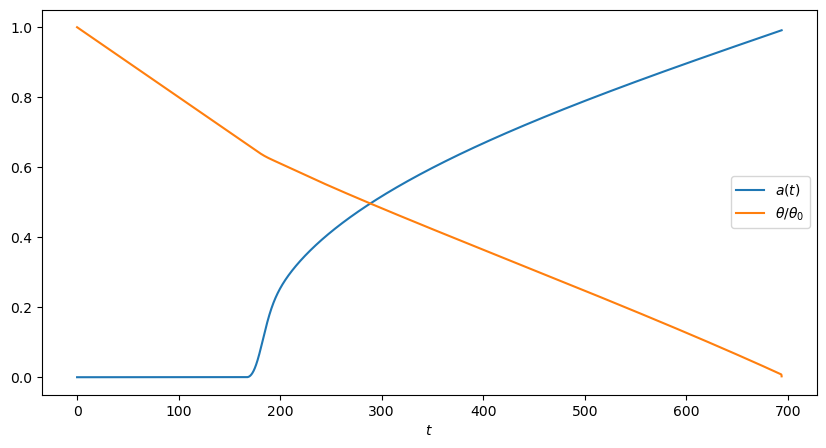

In [90]:
# Parameters
L = 1000     # Time domain
N = 10000    # Number of grid points
dx = L/N    # Time step

# Problem-specific parameters
F = 10
S = 1
y2_0 = 1.5  # Initial theta (theta_0)
Fs = 0.01

# Define the ODE functions
def f1(x, y1, y2):
    if y2 < (1 - y1**2):
        return (1 - y1**2 - y2)**(4/3)
    else:
        return 0.0

def f2(x, y1, y2):
    if y1 >= 1:
        return 0.0
    if y2 < (1 - y1**2):
        flux_term = (1 - y1**2 - y2)**(4/3)
    else:
        flux_term = 0.0
    return (3*S/(1 - y1**3)) * (y1**2 * flux_term - Fs/F)

# Numerical grid
x = np.arange(0, L+dx, dx)
y1 = np.zeros(len(x))       # Array for a(t)
y2 = np.zeros(len(x))       # Array for theta(t)

# Initial conditions
y1[0] = 0.0    # a(0) = 0
y2[0] = y2_0   # theta(0) = 1.5

# Compute the stopping threshold for θ
bound = (Fs/F)**(3/4)

print(f"Stopping bound for $\theta$: {bound:.6f}")

# Mid-point Euler method
i = 0
while i < N and y2[i] > bound:
    ym1 = y1[i] + (dx/2) * f1(x[i], y1[i], y2[i])
    ym2 = y2[i] + (dx/2) * f2(x[i], y1[i], y2[i])
    y1[i + 1] = y1[i] + dx * f1(x[i] + dx/2, ym1, ym2)
    y2[i + 1] = y2[i] + dx * f2(x[i] + dx/2, ym1, ym2)
    i += 1

x = x[:i+1]
y1 = y1[:i+1]
y2 = y2[:i+1]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y1 , label='$a(t)$')
ax.plot(x, y2/y2_0, label='$\\theta/\\theta_0$')
ax.set_xlabel('$t$')
ax.legend()
#ax.grid(True)
plt.show()


***Comments:***

The temperature falls rapidly due to high $\theta_0$.The graph of $a(t)$ indicates a steady period for early times,where the solidification is not yet significant because of the high temperature difference. The solidification starts and increases as $\sqrt{t}$ when $\theta / \theta_0$ approches $0.5$ until the temperature becomes stable at approximately $t = 700$.
The graphs of $\theta / \theta_0$ shows that solidification starts only after a significant decrease in temperature. 

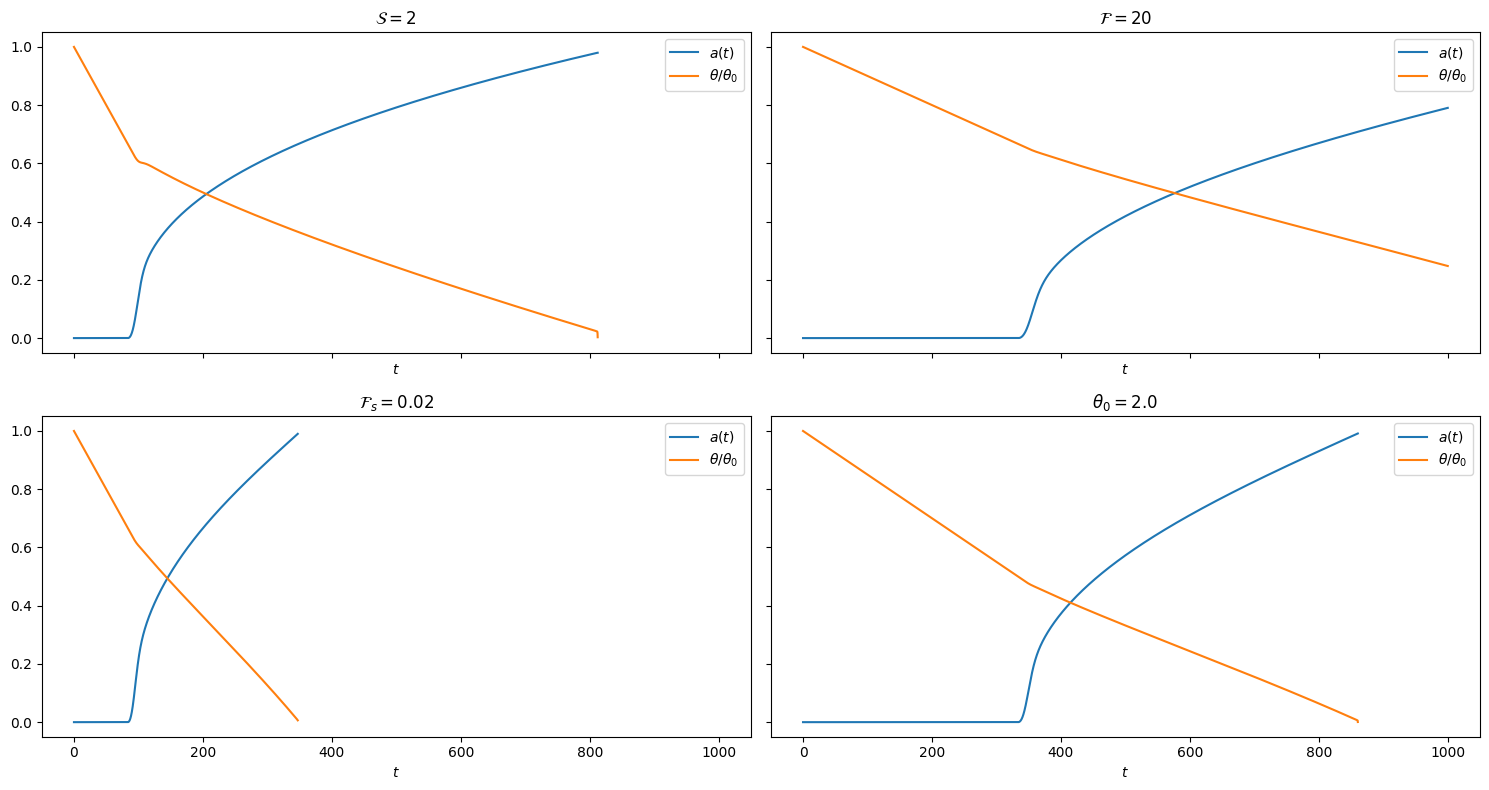

In [102]:
def run_simulation(S, F, Fs, y2_0, L=1000, N=10000):
    dx = L / N  # Time step
    x = np.arange(0, L + dx, dx)
    y1 = np.zeros(len(x))  # a(t)
    y2 = np.zeros(len(x))  # theta(t)
    y1[0] = 0.0  # Initial a(0)
    y2[0] = y2_0  # Initial theta(0)

    # define the equations da/dt and dθ/dt
    def f1(x, y1, y2):
        if y2 < (1 - y1**2):
            return (1 - y1**2 - y2)**(4/3) / S
        else:
            return 0.0

    def f2(x, y1, y2):
        if y2 < (1 - y1**2):
            flux_term = (1 - y1**2 - y2)**(4/3)
        else:
            flux_term = 0.0
        return (3 * S / (1 - y1**3)) * (y1**2 * flux_term - Fs / F)

    bound = (Fs / F)**(3/4)

    # Midpoint Euler method
    i = 0
    while i < N and y2[i] > bound:
        ym1 = y1[i] + (dx / 2) * f1(x[i], y1[i], y2[i])
        ym2 = y2[i] + (dx / 2) * f2(x[i], y1[i], y2[i])
        y1[i + 1] = y1[i] + dx * f1(x[i] + dx / 2, ym1, ym2)
        y2[i + 1] = y2[i] + dx * f2(x[i] + dx / 2, ym1, ym2)
        i += 1

    x = x[:i + 1]
    y1 = y1[:i + 1]
    y2 = y2[:i + 1]
    return x, y1, y2, y2_0


# Base parameters used in the first plot above
base_S = 1.0
base_F = 10.0
base_Fs = 0.01
base_y2_0 = 1.5

# We want to vary some parameters to study the behavior of the solutions
param_sets = [
    {"S": 2.0, "F": base_F, "Fs": base_Fs, "y2_0": base_y2_0, "label": "$\mathcal{S} = 2$"},
    {"S": base_S, "F": 20.0, "Fs": base_Fs, "y2_0": base_y2_0, "label": "$\mathcal{F} = 20$"},
    {"S": base_S, "F": base_F, "Fs": 0.02, "y2_0": base_y2_0, "label": "$\mathcal{F}_s = 0.02$"},
    {"S": base_S, "F": base_F, "Fs": base_Fs, "y2_0": 2.0, "label": "$\\theta_0 = 2.0$"}
]

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)

for idx, params in enumerate(param_sets):
    S = params["S"]
    F = params["F"]
    Fs = params["Fs"]
    y2_0 = params["y2_0"]
    label = params["label"]

    # Run simulation
    x, y1, y2, y2_0 = run_simulation(S, F, Fs, y2_0)

    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Plot
    ax.plot(x, y1, label='$a(t)$')
    ax.plot(x, y2 / y2_0, label='$\\theta/\\theta_0$')
    ax.set_title(label)
    ax.set_xlabel('$t$')
    ax.legend()

plt.tight_layout();

These plots indicate that the cases where we doubled one parameter at a time while keeping the others at their base values. The most significant observation is that increasing the $\cal{S}$ or $\cal{F_s}$ accelerate the solidification proccess as $a$ start to grow earlier ($t\leq 100$). We can also observe from the plot when $\cal{F}_s = 0$ (bottom-left) that not only the solidification starts early but also the growth is fast as the temperature falls rapidly. On the other hand, high value of $\theta_0$ or $\cal{F}$ delays the begining of solidification and lower the rate at which the core solidifies. Strong convection slower the process of solidification.